In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import datetime


In [32]:
dataframe = pd.read_csv('Top-50-musicality-global.csv')

In [33]:
dataframe.describe()

,Unnamed: 0,Popularity,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,1794.000000,78.451101,0.688079,0.285637,193871.083031,0.646463,0.019187,5.348008,0.171895,-6.616918,0.503483,0.105122,121.027742,3.906659,0.528968
std,1036.199386,15.242710,0.135642,0.258611,47673.155605,0.163505,0.094564,3.494953,0.123540,2.658782,0.500058,0.097852,27.624052,0.433971,0.228932
min,0.000000,0.000000,0.244000,0.000008,61673.000000,0.024200,0.000000,0.000000,0.015400,-19.518000,0.000000,0.023200,60.038000,1.000000,0.037300
25%,897.000000,67.000000,0.596000,0.079600,162768.000000,0.543000,0.000000,2.000000,0.097400,-8.065000,0.000000,0.039900,99.904000,4.000000,0.359000
50%,1794.000000,83.000000,0.706000,0.188000,187027.000000,0.669000,0.000001,5.000000,0.120000,-6.238000,1.000000,0.063300,118.024000,4.000000,0.524000
75%,2691.000000,90.000000,0.795000,0.441000,219724.000000,0.762000,0.000089,8.000000,0.214000,-4.813000,1.000000,0.131000,139.945000,4.000000,0.720000
max,3588.000000,100.000000,0.974000,0.984000,641941.000000,0.992000,0.901000,11.000000,0.963000,1.155000,1.000000,0.731000,217.969000,5.000000,0.978000


In [34]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3589 non-null   int64  
 1   Country           3589 non-null   object 
 2   Track Name        3583 non-null   object 
 3   Artist Name       3583 non-null   object 
 4   Album Name        3583 non-null   object 
 5   Popularity        3589 non-null   int64  
 6   Date              3589 non-null   object 
 7   Markets           3583 non-null   object 
 8   Danceability      3589 non-null   float64
 9   Acousticness      3589 non-null   float64
 10  duration          3589 non-null   int64  
 11  Energy            3589 non-null   float64
 12  Instrumentalness  3589 non-null   float64
 13  Key               3589 non-null   int64  
 14  Liveness          3589 non-null   float64
 15  Loudness          3589 non-null   float64
 16  Mode              3589 non-null   int64  


In [35]:
# Drop Unnamed: 0 as it’s unnecessary.
# Handle potential missing values in Country, Track Name, Artist Name, Album Name, and Markets. (see above the number of non-null values)

dataframe = dataframe.drop(columns=["Unnamed: 0"])
# dataframe = dataframe.dropna() # kikapcsolom ezt mert lent van egy  jobb megoldás. Enkódoljuk a NaN értékeket számokká és úgy korreláltatjuk őket.

# Ez a sor hibás és mindent kinulláz sajnos:
# dataframe = dataframe.filter(["Global"], axis=0) # Tehát by Country
dataframe = dataframe.query('Country == "Global"')

print(dataframe.describe())


       Popularity  Danceability  Acousticness       duration     Energy  \
count   50.000000     50.000000     50.000000      50.000000  50.000000   
mean    92.260000      0.657500      0.281950  196977.840000   0.631982   
std      4.439204      0.137168      0.291484   40148.814813   0.172986   
min     82.000000      0.419000      0.000418  125040.000000   0.091100   
25%     90.000000      0.546750      0.063050  168676.750000   0.526750   
50%     93.000000      0.654000      0.178000  194693.500000   0.678500   
75%     95.000000      0.779000      0.363000  228907.500000   0.737750   
max    100.000000      0.911000      0.969000  279833.000000   0.944000   

       Instrumentalness        Key   Liveness   Loudness       Mode  \
count         50.000000  50.000000  50.000000  50.000000  50.000000   
mean           0.012644   4.940000   0.179216  -6.666560   0.620000   
std            0.046039   3.501661   0.130146   3.004104   0.490314   
min            0.000000   0.000000   0.0

In [36]:
dataframe['Country'] = pd.Series(dataframe['Country'], dtype="string")
dataframe['Track Name'] = pd.Series(dataframe['Track Name'], dtype="string")
dataframe['Artist Name'] = pd.Series(dataframe['Artist Name'], dtype="string")
dataframe['Album Name'] = pd.Series(dataframe['Album Name'], dtype="string")
dataframe['Markets'] = pd.Series(dataframe['Markets'], dtype="string")


# Convert Date to datetime type.
dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors='coerce')

# Convert miliseconds to seconds.rt
dataframe['duration'] = pd.Series(dataframe['duration'].transform(lambda x: x / 1000))

# dataframe['duration'] = pd.Series(dataframe['duration'].transform(lambda x: datetime.timedelta(milliseconds=x)))

In [37]:
dataframe.dtypes

Country             string[python]
Track Name          string[python]
Artist Name         string[python]
Album Name          string[python]
Popularity                   int64
Date                datetime64[ns]
Markets             string[python]
Danceability               float64
Acousticness               float64
duration                   float64
Energy                     float64
Instrumentalness           float64
Key                          int64
Liveness                   float64
Loudness                   float64
Mode                         int64
Speechiness                float64
Tempo                      float64
TSignature                   int64
Positiveness               float64
dtype: object

In [38]:
print(dataframe.head)

<bound method NDFrame.head of    Country                                         Track Name  \
0   Global                               Standing Next to You   
1   Global                                             greedy   
2   Global                                        Si No Estás   
3   Global                Seven (feat. Latto) (Explicit Ver.)   
4   Global  Is It Over Now? (Taylor's Version) (From The V...   
5   Global                                        PERRO NEGRO   
6   Global                                 Paint The Town Red   
7   Global                                       Cruel Summer   
8   Global                                             MONACO   
9   Global                              My Love Mine All Mine   
10  Global                                          Strangers   
11  Global                                              Water   
12  Global  Now That We Don't Talk (Taylor's Version) (Fro...   
13  Global                                       HARLEY QUIN

In [39]:
dataframe.sort_values(['Country', 'Artist Name', 'Album Name', 'Popularity'], ascending=False, inplace=True)
print(dataframe.head)

<bound method NDFrame.head of    Country                                         Track Name  \
2   Global                                        Si No Estás   
27  Global                                              Prada   
36  Global      I Remember Everything (feat. Kacey Musgraves)   
11  Global                                              Water   
34  Global                                       Another Love   
46  Global     One Of The Girls (with JENNIE, Lily Rose Depp)   
28  Global                                            Starboy   
43  Global                                        Die For You   
42  Global                                    Sweater Weather   
45  Global                                       Now And Then   
7   Global                                       Cruel Summer   
4   Global  Is It Over Now? (Taylor's Version) (From The V...   
12  Global  Now That We Don't Talk (Taylor's Version) (Fro...   
19  Global        "Slut!" (Taylor's Version) (From The Vault

In [40]:
dataframe.describe()


,Popularity,Date,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
count,50.000000,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,92.260000,2022-06-19 05:45:36,0.657500,0.281950,196.977840,0.631982,0.012644,4.940000,0.179216,-6.666560,0.620000,0.079844,115.733280,3.840000,0.475284
min,82.000000,2013-04-19 00:00:00,0.419000,0.000418,125.040000,0.091100,0.000000,0.000000,0.060300,-17.665000,0.000000,0.025600,67.528000,1.000000,0.066200
25%,90.000000,2023-04-24 06:00:00,0.546750,0.063050,168.676750,0.526750,0.000000,2.000000,0.095975,-8.301500,0.000000,0.036375,95.242500,4.000000,0.253500
50%,93.000000,2023-08-25 00:00:00,0.654000,0.178000,194.693500,0.678500,0.000003,5.000000,0.126000,-6.143500,1.000000,0.049450,110.537000,4.000000,0.420000
75%,95.000000,2023-10-13 00:00:00,0.779000,0.363000,228.907500,0.737750,0.000155,8.000000,0.215500,-4.833000,1.000000,0.083825,130.068000,4.000000,0.718000
max,100.000000,2023-11-03 00:00:00,0.911000,0.969000,279.833000,0.944000,0.267000,11.000000,0.641000,-2.248000,1.000000,0.307000,186.003000,4.000000,0.937000
std,4.439204,NaN,0.137168,0.291484,40.148815,0.172986,0.046039,3.501661,0.130146,3.004104,0.490314,0.075640,27.904669,0.509502,0.267188


In [41]:
dataframe.isnull().sum()

Country             0
Track Name          0
Artist Name         0
Album Name          0
Popularity          0
Date                0
Markets             0
Danceability        0
Acousticness        0
duration            0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
TSignature          0
Positiveness        0
dtype: int64

In [42]:
dataframe.dropna(inplace = True)
print(dataframe.head)

<bound method NDFrame.head of    Country                                         Track Name  \
2   Global                                        Si No Estás   
27  Global                                              Prada   
36  Global      I Remember Everything (feat. Kacey Musgraves)   
11  Global                                              Water   
34  Global                                       Another Love   
46  Global     One Of The Girls (with JENNIE, Lily Rose Depp)   
28  Global                                            Starboy   
43  Global                                        Die For You   
42  Global                                    Sweater Weather   
45  Global                                       Now And Then   
7   Global                                       Cruel Summer   
4   Global  Is It Over Now? (Taylor's Version) (From The V...   
12  Global  Now That We Don't Talk (Taylor's Version) (Fro...   
19  Global        "Slut!" (Taylor's Version) (From The Vault

In [43]:
dataframe['Danceability'].value_counts().describe()

count    48.000000
mean      1.041667
std       0.201941
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: count, dtype: float64

In [44]:
dataframe['Positiveness'].value_counts().describe()

count    50.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: count, dtype: float64

In [45]:
import seaborn as sns

In [46]:
dataframe['Popularity'].corr(dataframe['Danceability'])

-0.00487649157524192

In [47]:
dataframe['Popularity'].corr(dataframe['Positiveness'])

-0.07322726717425172

In [48]:
dataframe['Popularity'].corr(dataframe['Tempo'])

0.29460217568615354

In [49]:
# sns.heatmap(dataframe[['Popularity', 'Danceability', 'Positiveness', 'Tempo']].corr(method='pearson', min_periods=1))

In [50]:
dataframe.describe()


,Popularity,Date,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
count,50.000000,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,92.260000,2022-06-19 05:45:36,0.657500,0.281950,196.977840,0.631982,0.012644,4.940000,0.179216,-6.666560,0.620000,0.079844,115.733280,3.840000,0.475284
min,82.000000,2013-04-19 00:00:00,0.419000,0.000418,125.040000,0.091100,0.000000,0.000000,0.060300,-17.665000,0.000000,0.025600,67.528000,1.000000,0.066200
25%,90.000000,2023-04-24 06:00:00,0.546750,0.063050,168.676750,0.526750,0.000000,2.000000,0.095975,-8.301500,0.000000,0.036375,95.242500,4.000000,0.253500
50%,93.000000,2023-08-25 00:00:00,0.654000,0.178000,194.693500,0.678500,0.000003,5.000000,0.126000,-6.143500,1.000000,0.049450,110.537000,4.000000,0.420000
75%,95.000000,2023-10-13 00:00:00,0.779000,0.363000,228.907500,0.737750,0.000155,8.000000,0.215500,-4.833000,1.000000,0.083825,130.068000,4.000000,0.718000
max,100.000000,2023-11-03 00:00:00,0.911000,0.969000,279.833000,0.944000,0.267000,11.000000,0.641000,-2.248000,1.000000,0.307000,186.003000,4.000000,0.937000
std,4.439204,NaN,0.137168,0.291484,40.148815,0.172986,0.046039,3.501661,0.130146,3.004104,0.490314,0.075640,27.904669,0.509502,0.267188


# Analyze the Distribution of Popularity 

To get a sense of how popularity is distributed.

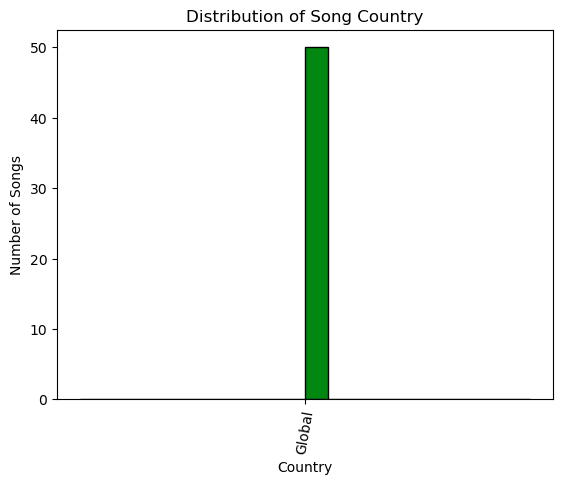

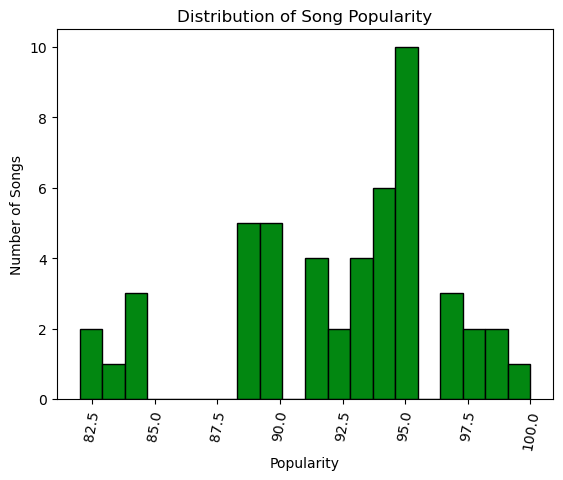

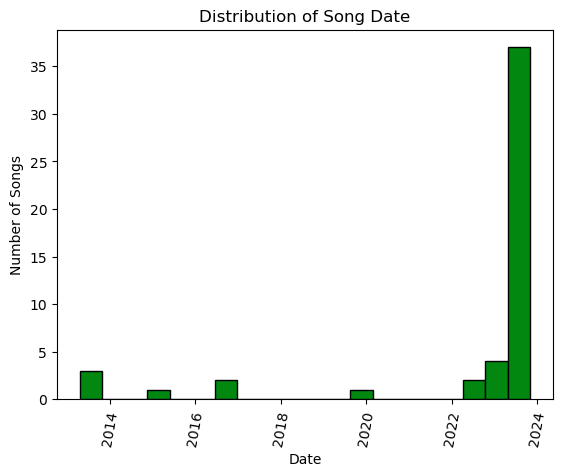

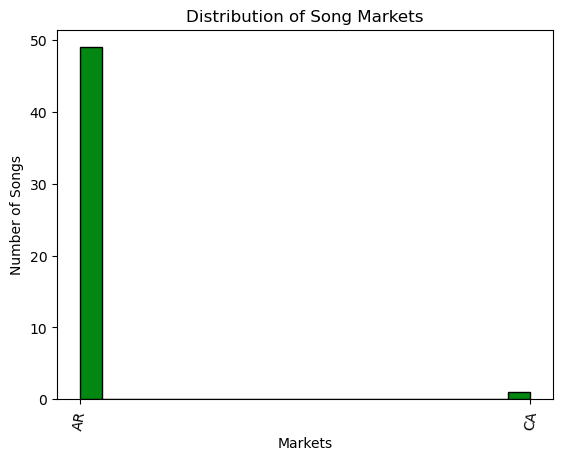

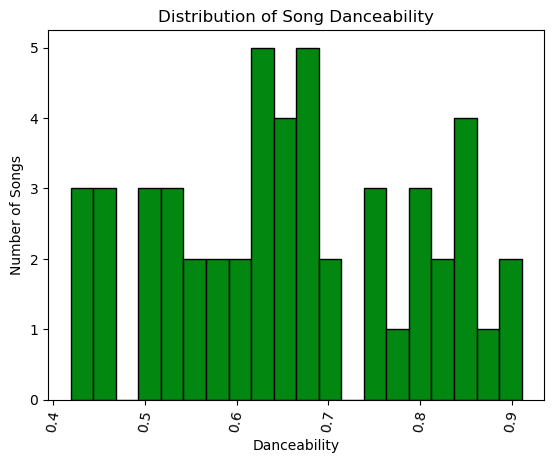

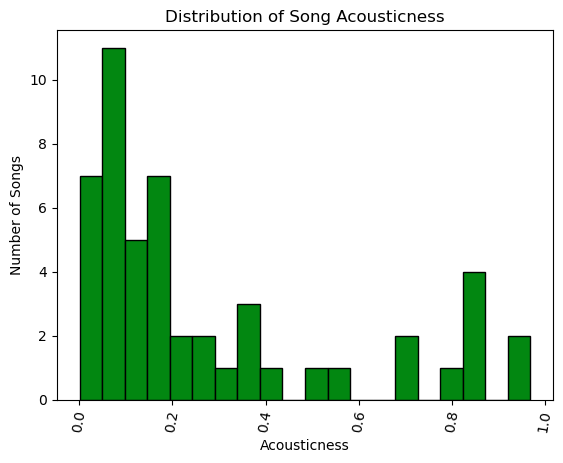

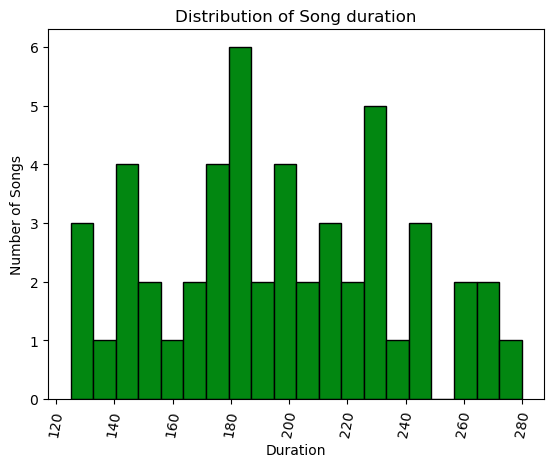

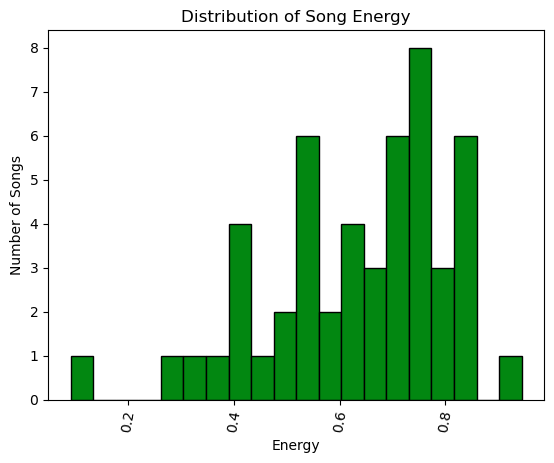

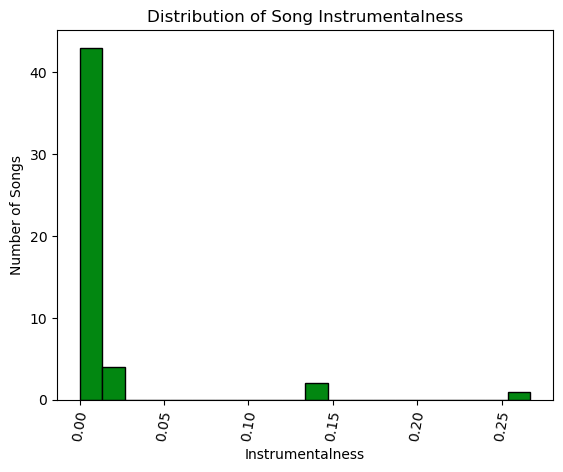

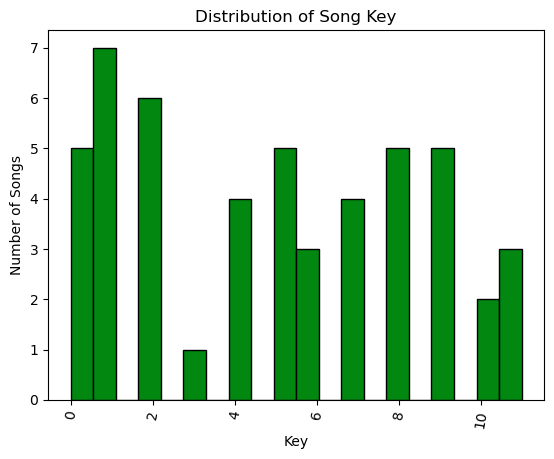

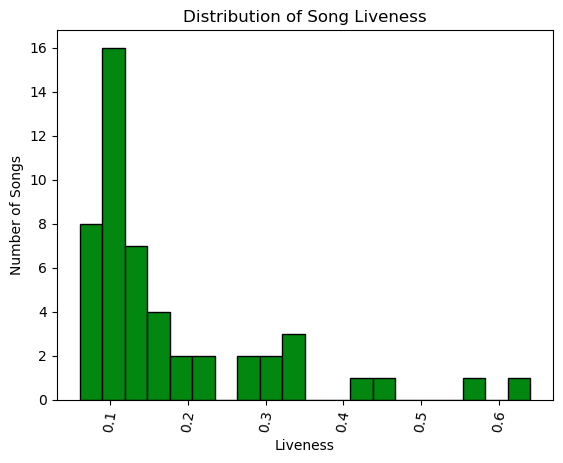

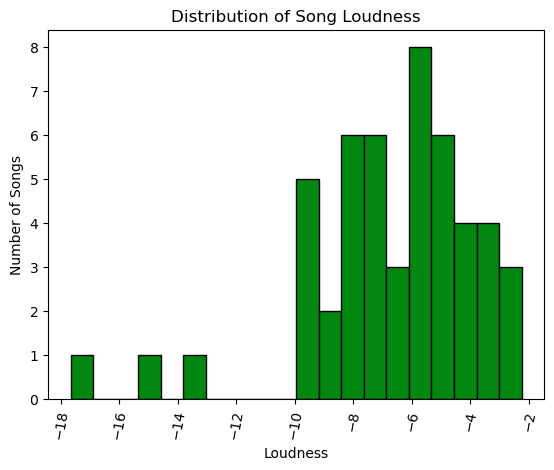

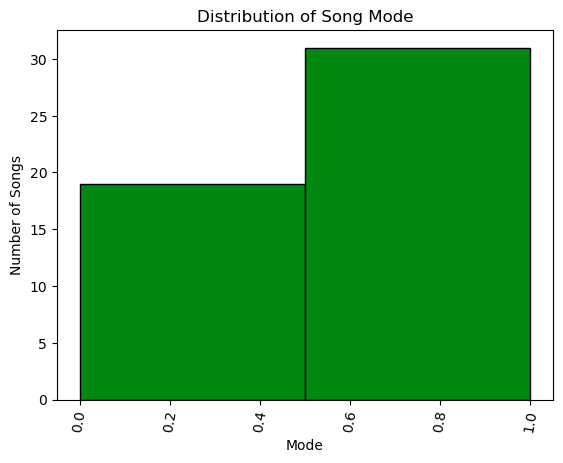

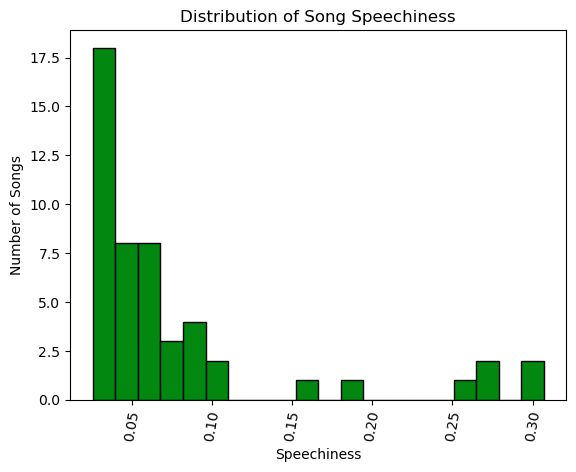

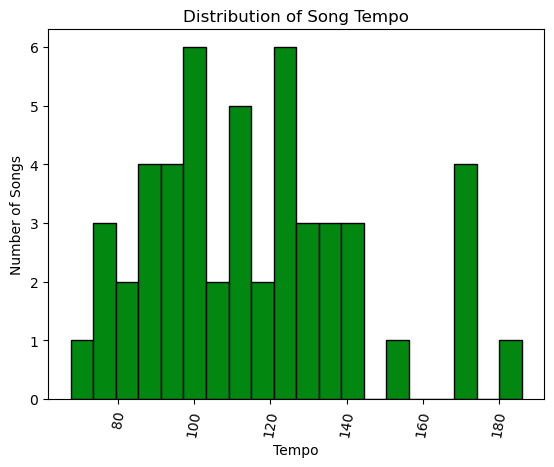

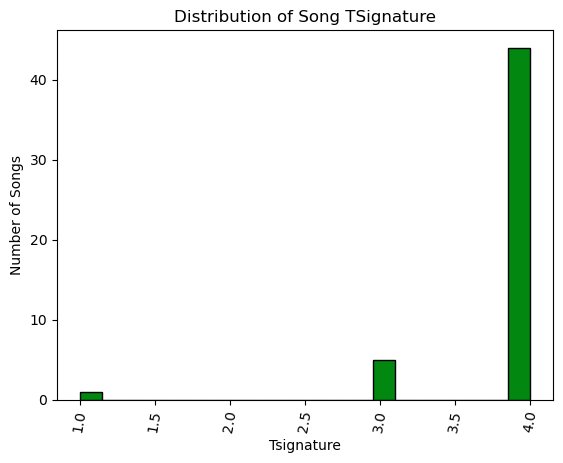

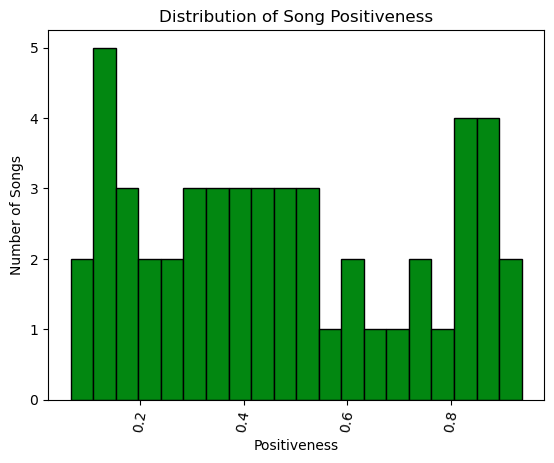

In [51]:

# Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness



attrbutes = ["Country","Popularity","Date","Markets","Danceability","Acousticness","duration","Energy","Instrumentalness","Key","Liveness","Loudness","Mode","Speechiness","Tempo","TSignature","Positiveness"]

for attr in attrbutes:
	key = attr
	
	if attr == "Mode":
		number_of_bins = 2
	else:
		number_of_bins = 20
	
	plt.hist(dataframe[key], bins=number_of_bins, color="#028711", edgecolor="black")
	plt.xlabel(f"{attr.capitalize()}")
	plt.ylabel("Number of Songs")
	plt.xticks(rotation=80, ha="center")
	plt.title(f"Distribution of Song {key}")
	plt.show()


Az előadók és albumok is elemzésre kerülhetnének de ezt most kihagyjuk mert úgy gondoljuk, hogy túlságosan két külön jellegű irányba vinné a projektet. Itt a fókusz a szám paraméterein kell legyen, nem az előadón.

In [52]:

print("Before Encoding:", dataframe.columns)

# dataframe = dataframe.drop("Track Name")
# dataframe = dataframe.drop(["Artist Name", "Track Name", "Album Name"])
# Nem értem, hogy miért ad hibát a kódom.


# df_encoded = pd.get_dummies(dataframe, columns=["Country", "Markets", "Track Name", "Artist Name", "Album Name"], drop_first=True)

df_encoded = pd.get_dummies(dataframe, drop_first=True, dummy_na=True)
# Parameters: 
# columns
# 	list-like, default None
#	Column names in the DataFrame to be encoded. If columns is None then all the columns with object, string, or category dtype will be converted.


print("After Encoding:", df_encoded.columns)



Before Encoding: Index(['Country', 'Track Name', 'Artist Name', 'Album Name', 'Popularity',
       'Date', 'Markets', 'Danceability', 'Acousticness', 'duration', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'TSignature', 'Positiveness'],
      dtype='object')
After Encoding: Index(['Popularity', 'Date', 'Danceability', 'Acousticness', 'duration',
       'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       ...
       'Album Name_The Land Is Inhospitable and So Are We', 'Album Name_Water',
       'Album Name_What Was I Made For? [From The Motion Picture "Barbie"]',
       'Album Name_Zach Bryan', 'Album Name_a Gift & a Curse',
       'Album Name_greedy', 'Album Name_nadie sabe lo que va a pasar mañana',
       'Album Name_<NA>', 'Markets_CA', 'Markets_<NA>'],
      dtype='object', length=143)


In [53]:
print(df_encoded.head())

    Popularity       Date  Danceability  Acousticness  duration  Energy  \
2           99 2022-09-23         0.537        0.8270   184.061   0.421   
27          94 2023-08-11         0.638        0.0010   132.359   0.717   
36          93 2023-08-25         0.429        0.5540   227.196   0.453   
11          95 2023-07-28         0.673        0.0856   200.256   0.722   
34          92 2013-06-24         0.445        0.6950   244.360   0.537   

    Instrumentalness  Key  Liveness  Loudness  ...  \
2           0.000000    5    0.1380    -8.720  ...   
27          0.000002    8    0.1130    -5.804  ...   
36          0.000002    0    0.1020    -7.746  ...   
11          0.000000    3    0.1370    -3.495  ...   
34          0.000017    4    0.0944    -8.532  ...   

    Album Name_The Land Is Inhospitable and So Are We  Album Name_Water  \
2                                               False             False   
27                                              False             False   

In [54]:
# Now calculate the correlation matrix
correlation_matrix = df_encoded.corr()

print(correlation_matrix)

                                                Popularity      Date  \
Popularity                                        1.000000 -0.006753   
Date                                             -0.006753  1.000000   
Danceability                                     -0.004876  0.337820   
Acousticness                                     -0.026022 -0.106610   
duration                                         -0.151637 -0.236804   
...                                                    ...       ...   
Album Name_greedy                                 0.251608  0.060966   
Album Name_nadie sabe lo que va a pasar mañana    0.215013  0.114488   
Album Name_<NA>                                        NaN       NaN   
Markets_CA                                       -0.301020 -0.354173   
Markets_<NA>                                           NaN       NaN   

                                                Danceability  Acousticness  \
Popularity                                         -0.004

In [55]:
# Check for NaN or Infinite values
if correlation_matrix.isnull().values.any() or (correlation_matrix == float('inf')).values.any():
    print("Data contains NaN or Infinite values!")
    
print(correlation_matrix.where(lambda col: col.isnull()).count())
print(correlation_matrix.where(lambda col: col == float("inf")).count())
# print(correlation_matrix.values().where(lambda col: math.isinf(col).count()))



Data contains NaN or Infinite values!
Popularity                                        0
Date                                              0
Danceability                                      0
Acousticness                                      0
duration                                          0
                                                 ..
Album Name_greedy                                 0
Album Name_nadie sabe lo que va a pasar mañana    0
Album Name_<NA>                                   0
Markets_CA                                        0
Markets_<NA>                                      0
Length: 143, dtype: int64
Popularity                                        0
Date                                              0
Danceability                                      0
Acousticness                                      0
duration                                          0
                                                 ..
Album Name_greedy                                 0


In [56]:
# from sklearn.preprocessing import StandardScaler

# Scale the correlation matrix to have mean 0 and variance 1
# scaler = StandardScaler()
# correlation_matrix_scaled = scaler.fit_transform(correlation_matrix)

# plt.figure(figsize=(12, 6))
# sns.heatmap(correlation_matrix_scaled, annot=False, cmap="coolwarm")
# plt.title("Scaled Feature Correlation Heatmap")
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0, va="center")
# plt.show()


                                                Popularity
Artist Name_Jung Kook                            -0.474827
Album Name_GOLDEN                                -0.470382
Track Name_Seven (feat. Latto) (Explicit Ver.)   -0.333527
Track Name_Agora Hills                           -0.333527
Album Name_Scarlet                               -0.313995
...                                                    ...
Country_<NA>                                           NaN
Track Name_<NA>                                        NaN
Artist Name_<NA>                                       NaN
Album Name_<NA>                                        NaN
Markets_<NA>                                           NaN

[142 rows x 1 columns]


Text(0.5, 1.0, 'Correlation with Popularity')

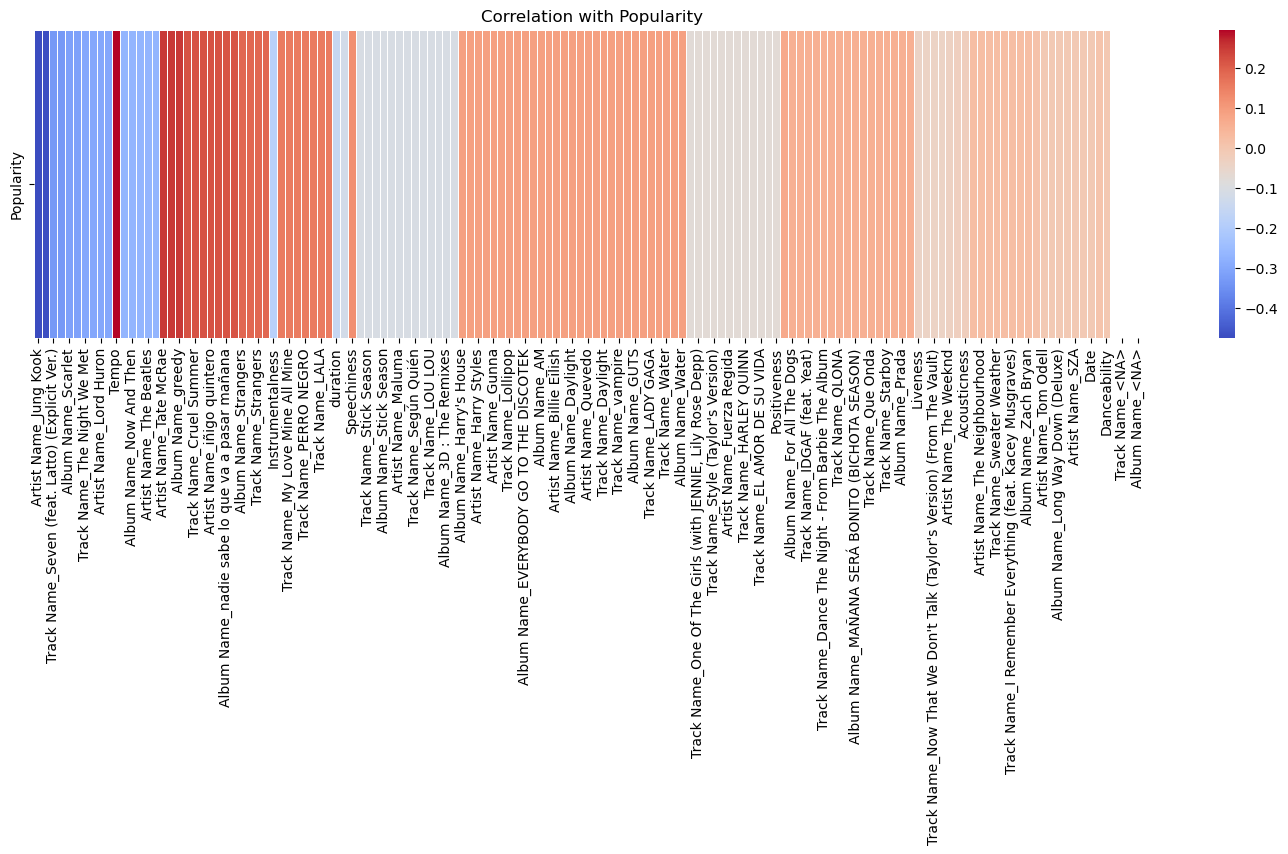

In [57]:
# Select only numeric columns for correlation calculation
# numeric_columns = dataframe.select_dtypes(include=["float64", "int64", "datetime"]).columns


# Compute the correlation matrix for the numeric columns
# correlation_matrix = dataframe[numeric_columns].corr()
# correlation_matrix = df_encoded[numeric_columns].corr()


correlation_matrix = df_encoded.corr()


# Extract the correlation of 'Popularity' with all other columns
popularity_corr = correlation_matrix["Popularity"].drop(["Popularity"])


# Reshape the data to make it suitable for a heatmap
popularity_corr = popularity_corr.to_frame()  # Convert to a DataFrame for better plotting

# Sort correlations by absolute value
popularity_corr = popularity_corr.sort_values(by='Popularity', ascending=False, key=lambda col: col.abs())

print(popularity_corr)

# Plot the heatmap
plt.figure(figsize=(18, 4))
# sns.heatmap(popularity_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
sns.heatmap(popularity_corr.T, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation with Popularity")

## Balra láthatók a népszerűséggel erősen összefüggő tényezők, függgetlenül attól,hogy pozitív vagy negatív a hatásuk. A hatás irányát a szín jelzi.

In [58]:

plt.show()


# Plot the correlation matrix
# plt.figure(figsize=(120, 60))
# sns.heatmap(popularity_corr.T, annot=False, cmap="coolwarm", vmin = -0.3, vmax=0.3)
# plt.title("Feature Correlation Heatmap")
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0, va="center")
# plt.show()


In [59]:
# Calculating the correlation of column A against all others
# corr_matrix = dataframe.corr()['A']


# f: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
# To find the correlation among
# the columns using pearson method
# dataframe.corr(method='pearson')

